### Regression


1. Linear Regression
2. Polynomial Regression
3. Support Vector Regression，SVR
4. Decision Tree Regression
5. Random Forest Regression
6. Gradient Boosting Regression
7. Neural Network Regression


### Classification

1. Logistic Regression
2. Decision Tree
3. Support Vector Machine，SVM
4. K-Nearest Neighbors，KNN
5. Naive Bayes
6. Random Forest
7. Gradient Boosting Tree
8. Neural Networks
9. Convolutional Neural Networks，CNN
10. Recurrent Neural Networks，RNN

a. Conduct exploratory analysis on the provided dataset. State your hypothesis based on the insights from your exploration.

b. Prepare your data for modelling (i.e., data cleaning and feature engineering).

b. Build a model to predict the output variable. Hint: you will need to try several models to find the best model for your problem.

c. Evaluate each model using the evaluation techniques you have learned in class.

d. Select and optimize your final model.

e. Explain your model to a business executive. Your explanation should include the following:

i. Your data exploration findings, initial hypothesis, and whether the hypothesis proved true.

ii. Your approach for building and evaluating the model. 

iii. The final model you selected and how you know this is the best model for the problem.

iv. How the model should be used by the business, in business process.

### 1. Dataset

##### 1.1 Import Libraries

In [129]:
pip install --upgrade pandas

Note: you may need to restart the kernel to use updated packages.


In [130]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import feature engineering libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Import performance metrics libraries
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve

# Import classification libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

##### 1.2 Load Dataset

In [131]:
df = pd.read_csv('https://raw.githubusercontent.com/GoldenSnow-Xue/schulich_data_science/main/MBAN%206110/Datasets/purchases.csv')
df

,index,complaints,transactions_ytd,avg_tr_amt,time_on_site,total_discounts,num_reviews,avg_review,returns,latest_review,num_total_purchases,purchase_made_last_month
0,0,6,16,169.65,517.00,134.11,10,2.63,13.0,3,31,Yes
1,1,7,15,160.80,160.80,125.75,6,1.92,12.0,3,44,Yes
2,2,4,11,165.13,165.13,124.16,7,2.27,16.0,2,30,Yes
3,3,4,12,184.29,184.29,164.87,7,3.33,7.0,3,31,No
4,4,5,19,224.24,224.24,204.93,13,3.75,0.0,3,43,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
9742,9742,9,11,170.61,170.61,121.57,7,2.65,14.0,3,34,No
9743,9743,6,15,164.04,164.04,131.60,9,2.48,9.0,3,40,Yes
9744,9744,8,16,176.52,176.52,99.72,7,3.28,10.0,3,36,No
9745,9745,7,12,186.93,186.93,114.78,9,3.48,12.0,3,36,No


In [132]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,9747.0,4873.000000,2813.860871,0.0,2436.5000,4873.000,7309.5000,9746.0
complaints,9747.0,6.774803,1.886223,1.0,5.0000,7.000,8.0000,14.0
transactions_ytd,9747.0,13.382169,2.856932,2.0,12.0000,14.000,15.0000,24.0
avg_tr_amt,9746.0,181.829052,17.813101,100.0,171.3400,182.640,193.7800,250.0
time_on_site,9743.0,181.860858,18.134314,100.0,171.3400,182.640,193.7800,517.0
total_discounts,9744.0,128.963755,30.971279,0.0,110.2475,128.975,148.3525,250.0
num_reviews,9747.0,8.562942,1.826682,1.0,7.0000,9.000,10.0000,15.0
avg_review,9747.0,2.943753,0.532284,1.0,2.5700,2.930,3.3000,5.0
returns,9746.0,11.713831,2.936036,0.0,10.0000,12.000,14.0000,23.0
latest_review,9747.0,3.250846,0.599925,1.0,3.0000,3.000,4.0000,5.0


----------------------------------
*** do the ranges make sense?

*** are there outliers?

*** which variables are categorical (even if there is a number indicator, like 1,2,3)

*** which variables are continuous

In [133]:
df.columns

Index(['index', 'complaints', 'transactions_ytd', 'avg_tr_amt', 'time_on_site',
       'total_discounts', 'num_reviews', 'avg_review', 'returns',
       'latest_review', 'num_total_purchases', 'purchase_made_last_month'],
      dtype='object')

In [134]:
# Categorical Variables
# 'complaints', 'num_reviews', 'avg_review', 'latest_review'

In [135]:
# Numerical Variables
# 'transactions_ytd', 'avg_tr_amt', 'time_on_site', 'total_discounts', 'returns', 'num_total_purchases'

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9747 entries, 0 to 9746
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     9747 non-null   int64  
 1   complaints                9747 non-null   int64  
 2   transactions_ytd          9747 non-null   int64  
 3   avg_tr_amt                9746 non-null   float64
 4   time_on_site              9743 non-null   float64
 5   total_discounts           9744 non-null   float64
 6   num_reviews               9747 non-null   int64  
 7   avg_review                9747 non-null   float64
 8   returns                   9746 non-null   float64
 9   latest_review             9747 non-null   int64  
 10  num_total_purchases       9747 non-null   int64  
 11  purchase_made_last_month  9747 non-null   object 
dtypes: float64(5), int64(6), object(1)
memory usage: 913.9+ KB


-------------------------------------
*** Missing data: there exists some missing data

*** Incorrect data type: no

### 2. Define a Problem Statement and Hypothesis

##### 2.1 Problem Statement:

##### 2.2 Hypothesis

### 3. Conduct Exploratory Data Analysis (EDA)

##### 3.1 Data Cleaning

* Deal with duplicates

In [137]:
df.drop(columns=['index'], axis= 1, inplace= True)

In [138]:
df = df.drop_duplicates()

In [139]:
df.describe(include='all')

,complaints,transactions_ytd,avg_tr_amt,time_on_site,total_discounts,num_reviews,avg_review,returns,latest_review,num_total_purchases,purchase_made_last_month
count,9747.000000,9747.000000,9746.000000,9743.000000,9744.000000,9747.000000,9747.000000,9746.000000,9747.000000,9747.000000,9747
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4888
mean,6.774803,13.382169,181.829052,181.860858,128.963755,8.562942,2.943753,11.713831,3.250846,36.914846,NaN
std,1.886223,2.856932,17.813101,18.134314,30.971279,1.826682,0.532284,2.936036,0.599925,5.159823,NaN
min,1.000000,2.000000,100.000000,100.000000,0.000000,1.000000,1.000000,0.000000,1.000000,15.000000,NaN
25%,5.000000,12.000000,171.340000,171.340000,110.247500,7.000000,2.570000,10.000000,3.000000,33.000000,NaN
50%,7.000000,14.000000,182.640000,182.640000,128.975000,9.000000,2.930000,12.000000,3.000000,37.000000,NaN
75%,8.000000,15.000000,193.780000,193.780000,148.352500,10.000000,3.300000,14.000000,4.000000,41.000000,NaN


* Deal with missing values

In [140]:
df.isnull().sum().sum()

9

In [141]:
9747*0.1
# 9 < 974, if missing values < 10%, just drop, otherwise fillna

974.7

In [142]:
# Drop rows with any missing values
df = df.dropna()

In [143]:
# Drop columns with any missing values
# df = df.dropna(axis=1)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9738 entries, 0 to 9746
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   complaints                9738 non-null   int64  
 1   transactions_ytd          9738 non-null   int64  
 2   avg_tr_amt                9738 non-null   float64
 3   time_on_site              9738 non-null   float64
 4   total_discounts           9738 non-null   float64
 5   num_reviews               9738 non-null   int64  
 6   avg_review                9738 non-null   float64
 7   returns                   9738 non-null   float64
 8   latest_review             9738 non-null   int64  
 9   num_total_purchases       9738 non-null   int64  
 10  purchase_made_last_month  9738 non-null   object 
dtypes: float64(5), int64(5), object(1)
memory usage: 912.9+ KB


* Deal with target variable

In [145]:
# univariate analysis - check the target variable
df.groupby('purchase_made_last_month').count()

,complaints,transactions_ytd,avg_tr_amt,time_on_site,total_discounts,num_reviews,avg_review,returns,latest_review,num_total_purchases
purchase_made_last_month,,,,,,,,,,
No,4887,4887,4887,4887,4887,4887,4887,4887,4887,4887
Yes,4851,4851,4851,4851,4851,4851,4851,4851,4851,4851


In [146]:
def purchase_made_last_month(x):
    if x == 'Yes':
        return 1
    elif x == 'No':
        return 0

In [147]:
df['purchase_made_last_month'] = df['purchase_made_last_month'].apply(purchase_made_last_month)
df['purchase_made_last_month'].value_counts()

purchase_made_last_month
0    4887
1    4851
Name: count, dtype: int64

In [148]:
df2 = df

In [149]:
df2.nunique()

complaints                    14
transactions_ytd              23
avg_tr_amt                  5108
time_on_site                5108
total_discounts             6388
num_reviews                   15
avg_review                   331
returns                       24
latest_review                  5
num_total_purchases           38
purchase_made_last_month       2
dtype: int64

##### 3.2 Data Visualization

* Numerical Variables

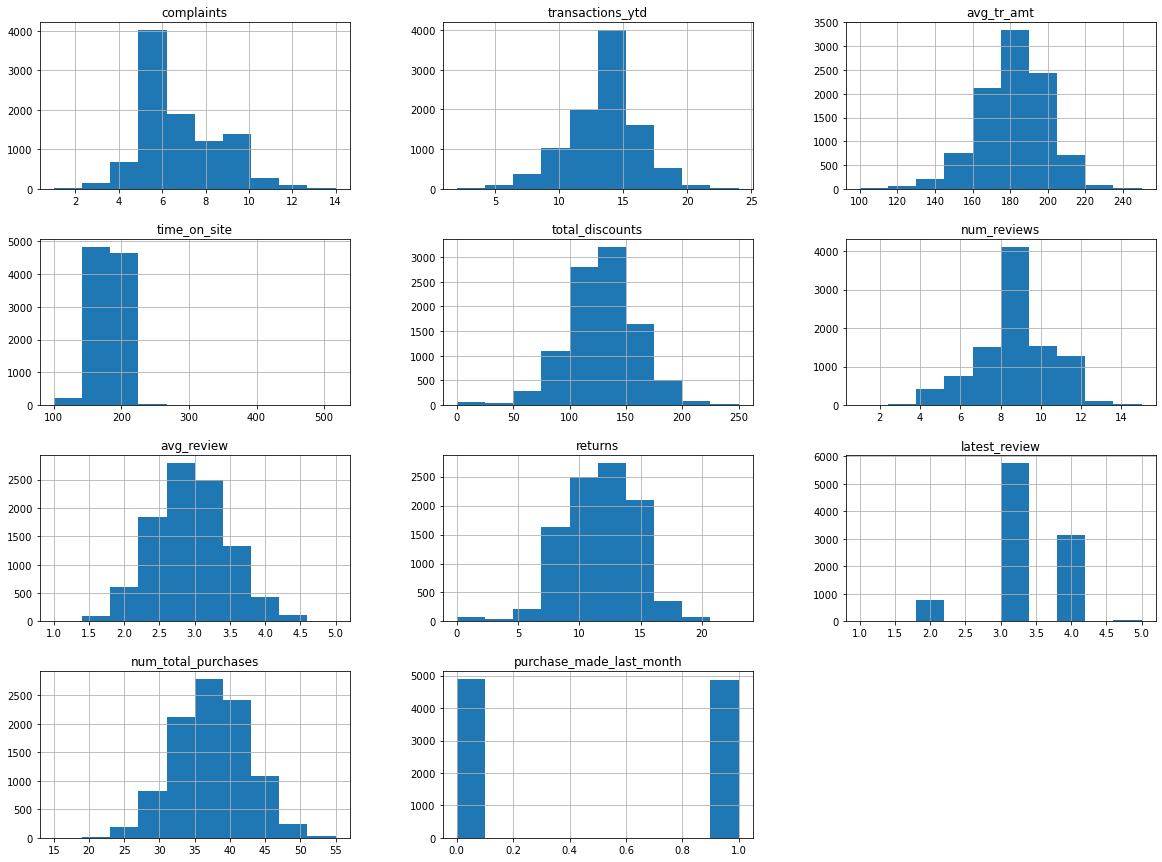

In [150]:
df2.hist(figsize=(20,15))
plt.show()

(0.0, 1.0, 0.0, 1.0)

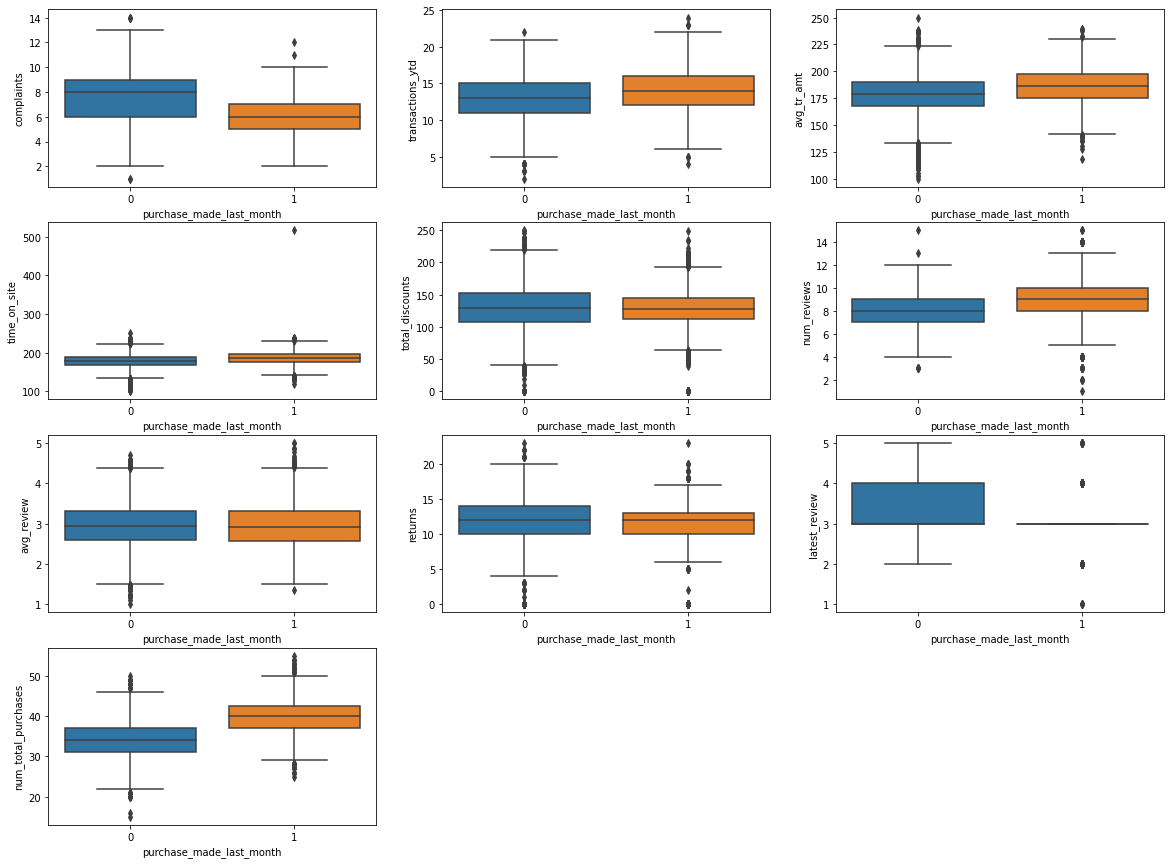

In [151]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(4,3, figsize=(20,15))

sns.boxplot(x='purchase_made_last_month',y='complaints', data=df2, ax=ax1)
sns.boxplot(x='purchase_made_last_month',y='transactions_ytd', data=df2, ax=ax2)
sns.boxplot(x='purchase_made_last_month',y='avg_tr_amt', data=df2, ax=ax3)
sns.boxplot(x='purchase_made_last_month',y='time_on_site', data=df2, ax=ax4)
sns.boxplot(x='purchase_made_last_month',y='total_discounts', data=df2, ax=ax5)
sns.boxplot(x='purchase_made_last_month',y='num_reviews', data=df2, ax=ax6)
sns.boxplot(x='purchase_made_last_month',y='avg_review', data=df2, ax=ax7)
sns.boxplot(x='purchase_made_last_month',y='returns', data=df2, ax=ax8)
sns.boxplot(x='purchase_made_last_month',y='latest_review', data=df2, ax=ax9)
sns.boxplot(x='purchase_made_last_month',y='num_total_purchases', data=df2, ax=ax10)

ax11.axis('off')
ax12.axis('off')

### 4. Feature Engineering

##### 4.1 Transformation

* Covert numerical variables to categorical variables

In [152]:
# Categorical Variables
# 'complaints', 'num_reviews', 'avg_review', 'latest_review'

In [153]:
df2['complaints'].value_counts()

complaints
6     2320
7     1887
5     1694
8     1216
9      879
4      670
10     507
11     281
3      138
12      88
2       28
13      24
14       4
1        2
Name: count, dtype: int64

In [154]:
def complaints(x):
    if x >= 0 and x <= 5:
        return 'low_complaints'
    elif x > 5 and x < 10:
        return "moderate_complaints"
    elif x >= 10:
        return "high_complaints"

df2['complaints'] = df2['complaints'].apply(complaints)

complaints_counts = df2['complaints'].value_counts()

print(complaints_counts)

complaints
moderate_complaints    6302
low_complaints         2532
high_complaints         904
Name: count, dtype: int64


In [155]:
df2['num_reviews'].value_counts()

num_reviews
8     2093
9     2019
10    1527
7     1510
11     897
6      753
12     365
5      312
13     103
4       96
14      31
3       22
2        5
15       4
1        1
Name: count, dtype: int64

In [156]:
def num_reviews(x):
    if x >= 0 and x <= 5:
        return 'low_num_reviews'
    elif x > 5 and x < 10:
        return "moderate_num_reviews"
    elif x >= 10:
        return "high_num_reviews"

df2['num_reviews'] = df2['num_reviews'].apply(num_reviews)

num_reviews_counts = df2['num_reviews'].value_counts()

print(num_reviews_counts)

num_reviews
moderate_num_reviews    6375
high_num_reviews        2927
low_num_reviews          436
Name: count, dtype: int64


In [157]:
df2['avg_review'].value_counts()

avg_review
2.89    86
2.83    85
2.87    83
2.99    81
2.76    81
        ..
1.43     1
1.11     1
1.45     1
4.55     1
4.44     1
Name: count, Length: 331, dtype: int64

In [158]:
def avg_review(x):
    if x <= 2.9:
        return 'below_avg_review'
    elif x > 2.9:
        return "over_avg_review"

df2['avg_review'] = df2['avg_review'].apply(avg_review)

avg_review_counts = df2['avg_review'].value_counts()

print(avg_review_counts)

avg_review
over_avg_review     5036
below_avg_review    4702
Name: count, dtype: int64


In [159]:
df2['latest_review'].value_counts()

latest_review
3    5762
4    3150
2     779
5      41
1       6
Name: count, dtype: int64

In [160]:
def latest_review(x):
    if x <= 3:
        return 'low_latest_review'
    elif x > 3:
        return "high_latest_review"

df2['latest_review'] = df2['latest_review'].apply(latest_review)

latest_review_counts = df2['latest_review'].value_counts()

print(latest_review_counts)

latest_review
low_latest_review     6547
high_latest_review    3191
Name: count, dtype: int64


In [161]:
df2.columns

Index(['complaints', 'transactions_ytd', 'avg_tr_amt', 'time_on_site',
       'total_discounts', 'num_reviews', 'avg_review', 'returns',
       'latest_review', 'num_total_purchases', 'purchase_made_last_month'],
      dtype='object')

In [162]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9738 entries, 0 to 9746
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   complaints                9738 non-null   object 
 1   transactions_ytd          9738 non-null   int64  
 2   avg_tr_amt                9738 non-null   float64
 3   time_on_site              9738 non-null   float64
 4   total_discounts           9738 non-null   float64
 5   num_reviews               9738 non-null   object 
 6   avg_review                9738 non-null   object 
 7   returns                   9738 non-null   float64
 8   latest_review             9738 non-null   object 
 9   num_total_purchases       9738 non-null   int64  
 10  purchase_made_last_month  9738 non-null   int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 912.9+ KB


##### 4.2 Feature Selection

### 5. Model Development

In [164]:
cat = ['complaints', 'num_reviews', 'avg_review', 'latest_review']
num = ['transactions_ytd', 'avg_tr_amt', 'time_on_site', 'total_discounts', 'returns', 'num_total_purchases']


* Build Pipeline

In [165]:
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat),
                                                 ('num', num_transformer, num)])

* Split training and testing sets

In [166]:
X_train, X_test, y_train, y_test = train_test_split(df2[cat+num], df2['purchase_made_last_month'], test_size=0.3, random_state=1)

In [167]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [168]:
X_train_transformed.shape

(6816, 16)

##### 5.1 Logistic Regression

In [169]:
log = LogisticRegression(max_iter=1000)

log_reg = log.fit(X_train_transformed, y_train)
y_pred_log = log.predict(X_test_transformed)

In [170]:
cv_scores_log = cross_val_score(log, X_train_transformed, y_train, cv=5, scoring='roc_auc')
print(f"Cross-validation scores for logistic regression: {round(cv_scores_log.mean(), 3)}.")

Cross-validation scores for logistic regression: 0.923.


In [171]:
matrix_log = confusion_matrix(y_test, y_pred_log)
matrix_log

array([[1211,  217],
       [ 237, 1257]], dtype=int64)

In [172]:
accuracy_log = round(accuracy_score(y_test, y_pred_log), 3)
recall_log = round(recall_score(y_test, y_pred_log), 3)
precision_log = round(precision_score(y_test, y_pred_log), 3)
f1_log = round(f1_score(y_test, y_pred_log,), 3)

print(f"The accuracy of logistic regression is {accuracy_log}.")
print(f"The recall of logistic regression is {recall_log}.")
print(f"The precission of logistic regression is {precision_log}.")
print(f"The f1 of logistic regression is {f1_log}.")

The accuracy of logistic regression is 0.845.
The recall of logistic regression is 0.841.
The precission of logistic regression is 0.853.
The f1 of logistic regression is 0.847.


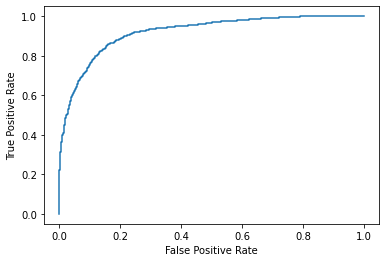

In [173]:
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, log.predict_proba(X_test_transformed)[:,1])

plt.plot(fpr_log,tpr_log)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [174]:
gmeans_log = np.sqrt(tpr_log*(1-fpr_log))
gmeans_log

array([0.        , 0.02587168, 0.47282228, 0.4726567 , 0.50082756,
       0.50065204, 0.5234947 , 0.52331111, 0.53028468, 0.53009858,
       0.54744282, 0.54725056, 0.55751429, 0.55731836, 0.58246427,
       0.58225943, 0.59582846, 0.59561877, 0.59896184, 0.5987509 ,
       0.60041487, 0.60020327, 0.60571489, 0.60550127, 0.60659721,
       0.60638312, 0.61991409, 0.61969515, 0.6271424 , 0.62669903,
       0.62880914, 0.62836396, 0.63568902, 0.63523834, 0.63575796,
       0.63553231, 0.64173277, 0.64150485, 0.64458163, 0.64435252,
       0.64893872, 0.6487079 , 0.66623694, 0.6659998 , 0.67288116,
       0.67240173, 0.67775572, 0.67751397, 0.68857026, 0.68783264,
       0.69352515, 0.69327706, 0.6984526 , 0.69820257, 0.70007443,
       0.69982364, 0.70075736, 0.70050615, 0.70097238, 0.70072091,
       0.70118666, 0.70093493, 0.70186517, 0.70161302, 0.70254169,
       0.70228912, 0.70460461, 0.70435111, 0.70527485, 0.70502093,
       0.70594313, 0.70568878, 0.71393202, 0.71367461, 0.71866

In [175]:
thresholds_log[np.argmax(gmeans_log)]

0.47443585741678934

##### 5.2 Gaussian Naive Bayes

In [177]:
nb = GaussianNB()

nb_model = nb.fit(X_train_transformed, y_train)
y_pred_nb = nb.predict(X_test_transformed)

In [179]:
# Cross-validation for NB
cv_scores_nb = cross_val_score(nb, X_train_transformed, y_train, cv=5, scoring='roc_auc')

print(f"Cross-validation scores for Naive Bayes: {round(cv_scores_nb.mean(), 3)}.")

Cross-validation scores for Naive Bayes: 0.894.


In [180]:
accuracy_nb = round(accuracy_score(y_test, y_pred_nb), 3)
recall_nb = round(recall_score(y_test, y_pred_nb), 3)
precision_nb = round(precision_score(y_test, y_pred_nb), 3)
f1_nb = round(f1_score(y_test, y_pred_nb), 3)

print(f"The accuracy of Gaussian Naive Bayes is {accuracy_nb}.")
print(f"The recall of Gaussian Naive Bayes is {recall_nb}.")
print(f"The precission of Gaussian Naive Bayes is {precision_nb}.")
print(f"The f1 of Gaussian Naive Bayes is {f1_nb}.")

The accuracy of Gaussian Naive Bayes is 0.776.
The recall of Gaussian Naive Bayes is 0.92.
The precission of Gaussian Naive Bayes is 0.72.
The f1 of Gaussian Naive Bayes is 0.808.


In [182]:
# Hyperparameter tuning
params_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
gridsearch_nb = GridSearchCV(nb, params_nb, cv=5, scoring='roc_auc')

nb_grid = gridsearch_nb.fit(X_train_transformed, y_train)

print("Best parameters for Gaussian Naive Bayes: ", gridsearch_nb.best_params_)

Best parameters for Gaussian Naive Bayes:  {'var_smoothing': 0.0533669923120631}


In [184]:
nb_best = GaussianNB(**gridsearch_nb.best_params_)

# Fit the models with the best parameters
nb_best_model = nb_best.fit(X_train_transformed, y_train)
y_pred_nb_best = nb_best.predict(X_test_transformed)

In [185]:
matrix_nb = confusion_matrix(y_test, y_pred_nb_best)
matrix_nb

array([[1117,  311],
       [ 224, 1270]], dtype=int64)

In [187]:
# Cross-validation for NB
cv_scores_nb_best = cross_val_score(nb_best, X_train_transformed, y_train, cv=5, scoring='roc_auc')
print(f"Cross-validation scores for Gaussian Naive Bayes: {round(cv_scores_nb_best.mean(), 3)}.")


accuracy_nb_best = round(accuracy_score(y_test, y_pred_nb_best), 3)
recall_nb_best = round(recall_score(y_test, y_pred_nb_best), 3)
precision_nb_best = round(precision_score(y_test, y_pred_nb_best), 3)
f1_nb_best = round(f1_score(y_test, y_pred_nb_best), 3)

print(f"The accuracy of Gaussian Naive Bayes is {accuracy_nb_best}.")
print(f"The recall of Gaussian Naive Bayes is {recall_nb_best}.")
print(f"The precission of Gaussian Naive Bayes is {precision_nb_best}.")
print(f"The f1 of Gaussian Naive Bayes is {f1_nb_best}.")

Cross-validation scores for Gaussian Naive Bayes: 0.898.
The accuracy of Gaussian Naive Bayes is 0.817.
The recall of Gaussian Naive Bayes is 0.85.
The precission of Gaussian Naive Bayes is 0.803.
The f1 of Gaussian Naive Bayes is 0.826.


In [189]:
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, nb_best.predict_proba(X_test_transformed)[:,1])

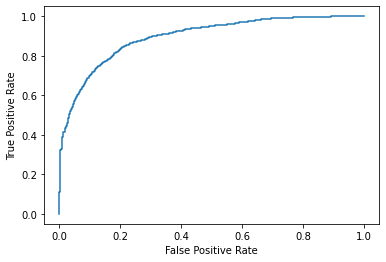

In [190]:
plt.plot(fpr_nb,tpr_nb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [191]:
gmeans_nb = np.sqrt(tpr_nb*(1-fpr_nb))
gmeans_nb

array([0.        , 0.02587168, 0.33433584, 0.33421876, 0.49274916,
       0.49257648, 0.50397867, 0.50380193, 0.52965451, 0.52946863,
       0.55890567, 0.55870939, 0.56700458, 0.56680532, 0.57090629,
       0.57050466, 0.57167015, 0.57146882, 0.57263153, 0.57242972,
       0.57705549, 0.57685198, 0.58143934, 0.58123414, 0.58973631,
       0.58952803, 0.60616897, 0.60595474, 0.62054513, 0.62032566,
       0.62405137, 0.62383051, 0.62700524, 0.62678317, 0.63046552,
       0.63024207, 0.63546372, 0.63523834, 0.63886682, 0.63864007,
       0.63915656, 0.63892954, 0.64047597, 0.63979279, 0.64491532,
       0.64445581, 0.64700006, 0.64676928, 0.64727675, 0.6470457 ,
       0.65108977, 0.6508572 , 0.65587545, 0.655641  , 0.65663969,
       0.65616982, 0.65766395, 0.65742835, 0.6584222 , 0.65818616,
       0.66016866, 0.65993183, 0.66240071, 0.66216291, 0.6660927 ,
       0.6658534 , 0.67024529, 0.67000433, 0.67677711, 0.67653362,
       0.67701462, 0.67677087, 0.67773152, 0.67748733, 0.68083

In [192]:
thresholds_nb[np.argmax(gmeans_nb)]

0.5431866606731555

##### 5.3 KNeighborsClassifier

In [193]:
knn = KNeighborsClassifier(n_neighbors=5)

knn_model = knn.fit(X_train_transformed, y_train)
y_pred_knn = knn.predict(X_test_transformed)

In [194]:
# Cross-validation for KNeighborsClassifier
cv_scores_knn = cross_val_score(knn, X_train_transformed, y_train, cv=5, scoring='roc_auc')

print(f"Cross-validation scores for Naive Bayes: {round(cv_scores_knn.mean(), 3)}.")

Cross-validation scores for Naive Bayes: 0.962.


In [195]:
accuracy_knn = round(accuracy_score(y_test, y_pred_knn), 3)
recall_knn = round(recall_score(y_test, y_pred_knn), 3)
precision_knn = round(precision_score(y_test, y_pred_knn), 3)
f1_knn = round(f1_score(y_test, y_pred_knn), 3)

print(f"The accuracy of KNeighborsClassifier is {accuracy_knn}.")
print(f"The recall of KNeighborsClassifier is {recall_knn}.")
print(f"The precission of KNeighborsClassifier is {precision_knn}.")
print(f"The f1 of KNeighborsClassifier is {f1_knn}.")

The accuracy of KNeighborsClassifier is 0.921.
The recall of KNeighborsClassifier is 0.932.
The precission of KNeighborsClassifier is 0.915.
The f1 of KNeighborsClassifier is 0.923.


In [196]:
# Hyperparameter tuning
params_knn = {'n_neighbors': list(range(1,100)), 'weights': ['uniform', 'distance']}
randomsearch_knn = RandomizedSearchCV(knn, params_knn, cv=10, scoring='roc_auc')

rs_knn = randomsearch_knn.fit(X_train_transformed, y_train)

print("Best parameters for KNN: ", randomsearch_knn.best_params_)

Best parameters for KNN:  {'weights': 'uniform', 'n_neighbors': 21}


In [197]:
knn_best = KNeighborsClassifier(**randomsearch_knn.best_params_)

# Fit the model with the best parameters
knn_best_model = knn_best.fit(X_train_transformed, y_train)
y_pred_knn_best = knn_best.predict(X_test_transformed)

In [198]:
matrix_knn = confusion_matrix(y_test, y_pred_knn_best)
matrix_knn

array([[1285,  143],
       [ 100, 1394]], dtype=int64)

In [199]:
# Cross-validation for KNeighborsClassifier
cv_scores_knn_best = cross_val_score(knn_best, X_train_transformed, y_train, cv=5, scoring='roc_auc')
print(f"Cross-validation scores for KNeighborsClassifier: {round(cv_scores_knn_best.mean(), 3)}.")


accuracy_knn_best = round(accuracy_score(y_test, y_pred_knn_best), 3)
recall_knn_best = round(recall_score(y_test, y_pred_knn_best), 3)
precision_knn_best = round(precision_score(y_test, y_pred_knn_best), 3)
f1_knn_best = round(f1_score(y_test, y_pred_knn_best), 3)

print(f"The accuracy of Gaussian Naive Bayes is {accuracy_knn_best}.")
print(f"The recall of Gaussian Naive Bayes is {recall_knn_best}.")
print(f"The precission of Gaussian Naive Bayes is {precision_knn_best}.")
print(f"The f1 of Gaussian Naive Bayes is {f1_knn_best}.")

Cross-validation scores for KNeighborsClassifier: 0.971.
The accuracy of Gaussian Naive Bayes is 0.917.
The recall of Gaussian Naive Bayes is 0.933.
The precission of Gaussian Naive Bayes is 0.907.
The f1 of Gaussian Naive Bayes is 0.92.


In [200]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_best.predict_proba(X_test_transformed)[:,1])

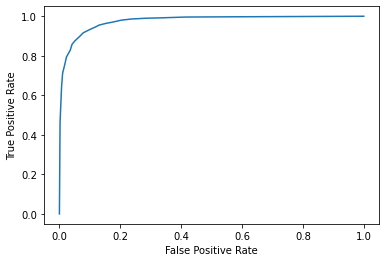

In [201]:
plt.plot(fpr_knn,tpr_knn)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [202]:
gmeans_knn = np.sqrt(tpr_knn*(1-fpr_knn))
gmeans_knn

array([0.        , 0.67986248, 0.79796064, 0.83907023, 0.86363958,
       0.88062304, 0.89389784, 0.9066442 , 0.91144032, 0.91535785,
       0.91894658, 0.91631237, 0.91319436, 0.91145112, 0.90372132,
       0.89440214, 0.88408292, 0.86790931, 0.84172482, 0.81192854,
       0.7631419 , 0.64300535, 0.        ])

In [203]:
thresholds_knn[np.argmax(gmeans_knn)]

0.5714285714285714

##### 5.4 RandomForestClassifier

In [205]:
rfc = RandomForestClassifier(random_state=1)

rfc_model = rfc.fit(X_train_transformed, y_train)
y_pred_rfc = rfc.predict(X_test_transformed)

In [207]:
# Cross-validation for RandomForestClassifier
cv_scores_rfc = cross_val_score(rfc, X_train_transformed, y_train, cv=5, scoring='roc_auc')

print(f"Cross-validation scores for RandomForestClassifier: {round(cv_scores_rfc.mean(), 3)}.")

Cross-validation scores for RandomForestClassifier: 0.972.


In [208]:
accuracy_rfc = round(accuracy_score(y_test, y_pred_rfc), 3)
recall_rfc = round(recall_score(y_test, y_pred_rfc), 3)
precision_rfc = round(precision_score(y_test, y_pred_rfc), 3)
f1_rfc = round(f1_score(y_test, y_pred_rfc), 3)

print(f"The accuracy of RandomForestClassifier is {accuracy_knn}.")
print(f"The recall of RandomForestClassifier is {recall_knn}.")
print(f"The precission of RandomForestClassifier is {precision_knn}.")
print(f"The f1 of RandomForestClassifier is {f1_knn}.")

The accuracy of RandomForestClassifier is 0.921.
The recall of RandomForestClassifier is 0.932.
The precission of RandomForestClassifier is 0.915.
The f1 of RandomForestClassifier is 0.923.


In [209]:
params_rfc = {"n_estimators": [200, 225, 275, 300], "max_depth": [None, 5, 10]}
gridsearch_rfc = GridSearchCV(rfc, params_rfc, cv=5, scoring='roc_auc')

grid_rfc = gridsearch_rfc.fit(X_train_transformed, y_train)

print("Best parameters for KNeighborsClassifier: ", gridsearch_rfc.best_params_)

Best parameters for KNeighborsClassifier:  {'max_depth': None, 'n_estimators': 300}


In [211]:
# Hyperparameter tuning
rfc_best = RandomForestClassifier(**gridsearch_rfc.best_params_)

# Fit the models with the best parameters
rfc_best_model = rfc_best.fit(X_train_transformed, y_train)
y_pred_rfc_best = nb_best.predict(X_test_transformed)

In [212]:
matrix_rfc = confusion_matrix(y_test, y_pred_rfc_best)
matrix_rfc

array([[1117,  311],
       [ 224, 1270]], dtype=int64)

In [215]:
# Cross-validation for RandomForestClassifier
cv_scores_rfc_best = cross_val_score(rfc_best, X_train_transformed, y_train, cv=5, scoring='f1')
print(f"Cross-validation scores for KNeighborsClassifier: {round(cv_scores_rfc_best.mean(), 3)}.")


accuracy_rfc_best = round(accuracy_score(y_test, y_pred_rfc_best), 3)
recall_rfc_best = round(recall_score(y_test, y_pred_rfc_best), 3)
precision_rfc_best = round(precision_score(y_test, y_pred_rfc_best), 3)
f1_rfc_best = round(f1_score(y_test, y_pred_rfc_best), 3)

print(f"The accuracy of Gaussian Naive Bayes is {accuracy_rfc_best}.")
print(f"The recall of Gaussian Naive Bayes is {recall_rfc_best}.")
print(f"The precission of Gaussian Naive Bayes is {precision_rfc_best}.")
print(f"The f1 of Gaussian Naive Bayes is {f1_rfc_best}.")

Cross-validation scores for KNeighborsClassifier: 0.918.
The accuracy of Gaussian Naive Bayes is 0.817.
The recall of Gaussian Naive Bayes is 0.85.
The precission of Gaussian Naive Bayes is 0.803.
The f1 of Gaussian Naive Bayes is 0.826.


In [ ]:
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, rfc_best.predict_proba(X_test_transformed.toarray())[:,1])

In [ ]:
plt.plot(fpr_rfc,tpr_rfc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
gmeans_rfc = np.sqrt(tpr_rfc*(1-fpr_rfc))
gmeans_rfc

In [ ]:
thresholds_rfc[np.argmax(gmeans_rfc)]

### 6. Model Evaluation Accuracy

In [ ]:
data = {'Model': ['LogisticRegression', 'Gaussian Naive Bayes', 'KNeighborsClassifier', 'RandomForestClassifier'],
        'Accuracy': [accuracy_log, accuracy_nb_best, accuracy_knn_best, accuracy_rfc_best],
        'Recall': [recall_log, recall_nb_best, recall_knn_best, recall_rfc_best],
        'Precision': [precision_log, precision_nb_best, precision_knn_best, precision_rfc_best],
        'F1': [f1_log, f1_nb_best, f1_knn_best, f1_rfc_best]}

results = pd.DataFrame(data)
results

##### 6.1 ROC Curve

In [ ]:
plt.figure(figsize=(12, 10))

# Plot ROC curve for Logistic Regression
plt.subplot(2, 2, 1)
plt.plot(fpr_log, tpr_log)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')

# Plot ROC curve for Naive Bayes
plt.subplot(2, 2, 2)
plt.plot(fpr_nb, tpr_nb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')

# Plot ROC curve for K-Nearest Neighbors
plt.subplot(2, 2, 3)
plt.plot(fpr_knn, tpr_knn)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - K-Nearest Neighbors')

# Plot ROC curve for Random Forest Classifier
plt.subplot(2, 2, 4)
plt.plot(fpr_rfc, tpr_rfc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()